In [ ]:
#Preprocessing 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np



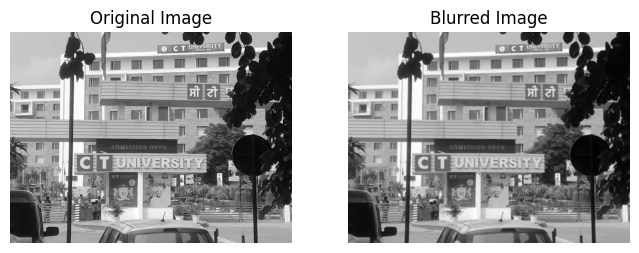

Denoised image saved to output/n_reduction.jpg


In [74]:
#STEP-1: NOISE REDUCTION
def n_reduction(img,k_size):
    return cv2.GaussianBlur(img,(k_size,k_size),9)

path = 'E:\CA_project-1\dataset_image\img6.jpg'
image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)


blurred = n_reduction(image,k_size=5)

fig, axes = plt.subplots(ncols=2,figsize=(8,5))
axes[0].imshow(image, cmap = 'gray')
axes[0].set_title('Original Image')

axes[1].imshow(blurred, cmap='gray')
axes[1].set_title('Blurred Image')


for ax in axes:
    ax.axis('off')

plt.show()
output_folder = 'output/'
output_filename = 'n_reduction.jpg'
output_path = output_folder + output_filename
cv2.imwrite(output_path, blurred)
print(f'Denoised image saved to {output_path}')


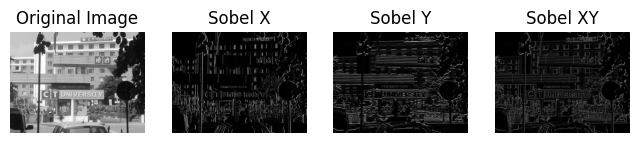

Denoised image saved to output/sobelxy.jpg


In [77]:
#STEP-2: Using sobel operator to calculate gradients
sobel_x = cv2.Sobel(image,-1,1,0,ksize=3)
sobel_y = cv2.Sobel(image,-1,0,1,ksize=3)
sobelxy = cv2.addWeighted(sobel_x,0.5,sobel_y,0.5,0)

fig, axes = plt.subplots(ncols=4,figsize=(8,5))
axes[0].imshow(image, cmap = 'gray')
axes[0].set_title('Original Image')

axes[1].imshow(sobel_x, cmap='gray')
axes[1].set_title('Sobel X')

axes[2].imshow(sobel_y, cmap='gray')
axes[2].set_title('Sobel Y')

axes[3].imshow(sobelxy, cmap='gray')
axes[3].set_title('Sobel XY')


for ax in axes:
    ax.axis('off')

plt.show()
output_folder = 'output/'
output_filename = 'sobel_x.jpg'
output_filename = 'sobelxy.jpg'
output_path = output_folder + output_filename
cv2.imwrite(output_path, sobel_x)
cv2.imwrite(output_path, sobelxy)
print(f'Denoised image saved to {output_path}')

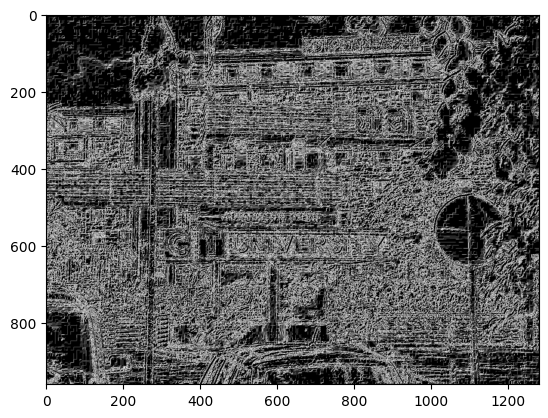

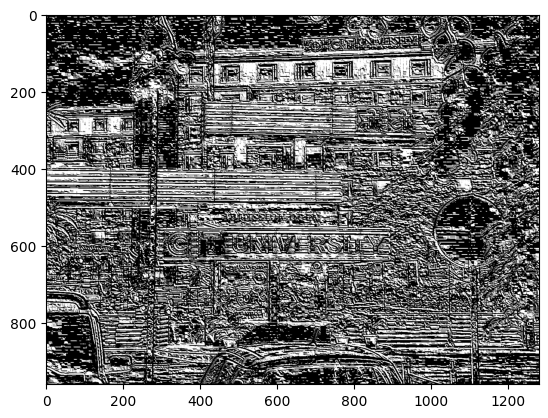

Denoised image saved to output/gradient_direction.jpeg


In [81]:
gradient_magnitude = np.sqrt(sobel_x**2+sobel_y**2)
plt.imshow(gradient_magnitude, cmap = 'gray')
plt.show()
gradient_direction = np.arctan2(sobel_y,sobel_x)
plt.imshow(gradient_direction, cmap = 'gray')
plt.show()
output_folder = 'output/'
output_filename = 'gradient_direction.jpeg'
output_path = output_folder + output_filename
cv2.imwrite(output_path,gradient_direction )
print(f'Denoised image saved to {output_path}')

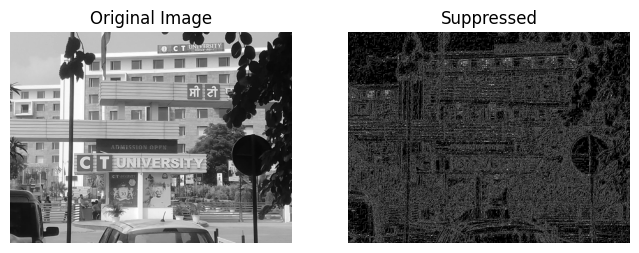

Denoised image saved to output/supressed2.jpg


In [82]:
#STEP-3: NON MAXIMIM SUPPRESSION
def non_max_supp(gradient_magnitude,gradient_direction):
    rows, cols = gradient_magnitude.shape
    supressed = np.zeros_like(gradient_magnitude)

    for i in range (1, rows-1):
        for j in range (1, cols - 1):
            angle = gradient_direction[i,j]

            if 0 <= angle < 22.5 or 337.5 <= angle <= 360:
                neighbor1 = gradient_magnitude[i, j+1]
                neighbor2 = gradient_magnitude[i, j-1]
            elif 22.5 <= angle <= 67.5:
                neighbor1 = gradient_magnitude[i-1, j+1]
                neighbor2 = gradient_magnitude[i+1, j-1]
            elif 67.5 <= angle < 112.5:
                neighbor1 = gradient_magnitude[i - 1, j]
                neighbor2 = gradient_magnitude[i + 1, j]
            else:
                neighbor1 = gradient_magnitude[i - 1, j - 1]
                neighbor2 = gradient_magnitude[i + 1, j + 1]
            if gradient_magnitude[i, j] >= neighbor1 and gradient_magnitude[i, j] >= neighbor2:
                supressed[i, j] = gradient_magnitude[i, j]

    return supressed
    
supressed =  non_max_supp(gradient_magnitude,gradient_direction)

fig, axes = plt.subplots(ncols=2,figsize=(8,6))

axes[0].imshow(image, cmap = 'gray')
axes[0].set_title('Original Image')

axes[1].imshow(supressed, cmap='gray')
axes[1].set_title('Suppressed')

for ax in axes:
    ax.axis('off')

plt.show()
    
output_folder = 'output/'
output_filename = 'supressed2.jpg'
output_path = output_folder + output_filename
cv2.imwrite(output_path,supressed )
print(f'Denoised image saved to {output_path}')



    

uint8


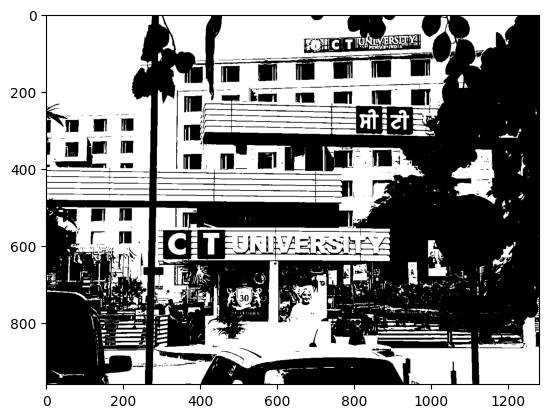

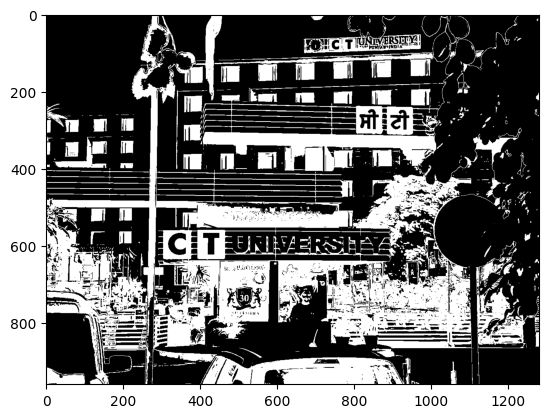

In [85]:
#STEP-4: Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

print(image.dtype)

if image.dtype != np.uint8:
    image = image.astype(np.uint8)

kernel = np.ones((3, 3), np.uint8)

strong_edges = (image >= high_threshold)
plt.imshow(strong_edges, cmap = 'gray')
plt.show()
weak_edges = (image >= low_threshold) & (image < high_threshold)
plt.imshow(weak_edges, cmap = 'gray')
plt.show()



In [ ]:
#STEP-5: EDGE DETECTION USING HYSTERESIS
def hysteresis (image, strong_edges, weak_edges):
    
    rows, cols = strong_edges.shape  
    image = np.zeros_like(strong_edges)
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            if (image[i,j] == weak_edges):
                try:
                    if ((image[i+1, j-1] == strong_edges) or (image[i+1, j] == strong_edges) or (image[i+1, j+1] == strong_edges)
                        or (image[i, j-1] == strong_edges) or (image[i, j+1] == strong_edges)
                        or (image[i-1, j-1] == strong_edges) or (image[i-1, j] == strong_edges) or (image[i-1, j+1] == strong_edges)):
                        image[i, j] = strong_edges
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    
    return image
#final_edges = hysteresis(strong_edges, weak_edges)
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Final edges')
plt.imshow(final_edges, cmap='gray')
plt.axis('off')

plt.show()

